# MC Event Weight

**Goal:** Empirically, I noticed that often times in event displays that I was looking at, the boosted events tended to have much smaller event weights.

Resolved Event             |  Boosted Event
:-------------------------:|:-------------------------:
![](../figures/SMNR_16/failed_2016_triggers/evtDisplays/evt_564884.pdf)  |  ![](../figures/SMNR_16/failed_2016_triggers/evtDisplays/evt_565916.pdf)

I was worried that this might make a difference in the trigger optimization studies, because Lucas showed this plot in his May 15th update that suggested that the optimizing on the SM NR sample gave better performance at the higher graviton masses, which really doesn't make sense intuitively, since the SM NR signal should not have as many events at high $m_{4j}$ as the dedicated graviton resonances.

<img src="../figures/Gravition_vs_SMNR_triggerOpt.png" style="width:400px;" />

So... I think I just need to make the mc event weight versus $m_{4j}$ plot to demonstrate this.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import glob
import uproot

import os
import sys
sys.path.append("../code")
from preprocess import read_tsv, fileDir, yr_short, triggers
from plotting import varEvolution, massPlane

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# btags = '4b'
# physicsSample = 'SMNR'

# nFiles = -1 # If we want to run over MORE THAN ONE file, but a subset of the ttl # of events 
# trigger ='2016_trigger'

In [10]:
cols = ['hh_m','m4j', 'mc_sf', 'mcEventWeight',
        'fourGoodJets', 'MDR', 'MDpT', 'cut_deta_hh', 'cut_Xwt', 'cut_Xhh',
        'nresolvedJets','njets','nbtags'] 

myFile = "../data/SMNR_PFlow/files/df_f_0.22_000001.h5"
df = pd.read_hdf(myFile,key='df')#,columns=cols)

### Read in *just* what was inside the df, before making *any* analysis specific cuts.

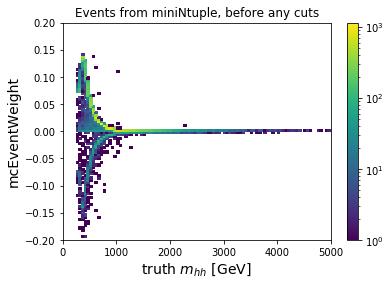

In [22]:
plt.hist2d(df['hh_m'],df['mcEventWeight'],bins=100,
           norm=LogNorm(),range=[[0,5000],[-0.2,0.2]])#,color=c_evt,alpha=0.5,log=True)
plt.title('Events from miniNtuple, before any cuts')
plt.xlabel('truth $m_{hh}$ [GeV]',fontsize=14)
plt.ylabel('mcEventWeight',fontsize=14)
plt.colorbar()
plt.savefig('../figures/SMNR_16/noTriggers/mcEventWeight_vs_hh_m.pdf')
plt.show()